In [0]:
# Import Python Packages ; Call Lord Ganesha
import torch
from torchsummary import summary
import torch.optim as optim

# Mount Google drive contents 
from google.colab import drive
drive.mount('/content/gdrive/')

import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/')


#Load the Modules of loading data set(Utils), Train and test functions(Train_Test), Model(resnet)
from Utils import Train_Test 
from Utils import Utils_v1 as Utils 
from Utils import GradCam_for_Resnet18
from Models import resnet

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
#Load Datasets, Dataloaders, Instantiatre Resnet18 Model

trainset, testset = Utils.Get_Cifar() # Load Cifar Data

SEED = 1
torch.manual_seed(SEED)

train_loader, test_loader = Utils.DataLoader(trainset, testset, 128, SEED) 

device = Utils.get_device()
print(device)

model = resnet.ResNet18().to(device) # Get resnet18 model instance
summary(model, input_size=(3, 32, 32))

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
         

In [0]:
# Model Training and Inference on Test Data

def update_lr(optimizer, lr):    
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
    return optimizer

curr_lr = 0.0005 
optimizer = optim.SGD(model.parameters(), lr=curr_lr, momentum=0.9,weight_decay=0.2)


EPOCHS = 24
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    Train_Test.train(model, device, train_loader, optimizer, epoch)
    Train_Test.test(model, device, test_loader)
    # Update Learning Rate every 10 epochs once
    if (epoch+1) % 10 == 0:
        curr_lr /= 3
        optimizer = update_lr(optimizer, curr_lr)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.4287803173065186 Batch_id=390 Accuracy=39.73: 100%|██████████| 391/391 [03:16<00:00,  2.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0125, Accuracy: 4282/10000 (42.82%)

EPOCH: 1


Loss=1.036621332168579 Batch_id=390 Accuracy=55.71: 100%|██████████| 391/391 [03:19<00:00,  2.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0102, Accuracy: 5511/10000 (55.11%)

EPOCH: 2


Loss=1.0620079040527344 Batch_id=390 Accuracy=64.68: 100%|██████████| 391/391 [03:10<00:00,  2.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0108, Accuracy: 5022/10000 (50.22%)

EPOCH: 3


Loss=0.7595899701118469 Batch_id=390 Accuracy=70.77: 100%|██████████| 391/391 [03:12<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0093, Accuracy: 6071/10000 (60.71%)

EPOCH: 4


Loss=1.0078309774398804 Batch_id=390 Accuracy=75.66: 100%|██████████| 391/391 [03:13<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0086, Accuracy: 6680/10000 (66.80%)

EPOCH: 5


Loss=0.8925577402114868 Batch_id=390 Accuracy=78.59: 100%|██████████| 391/391 [03:19<00:00,  2.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0078, Accuracy: 7397/10000 (73.97%)

EPOCH: 6


Loss=0.9818195104598999 Batch_id=390 Accuracy=80.83: 100%|██████████| 391/391 [03:09<00:00,  2.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0091, Accuracy: 7443/10000 (74.43%)

EPOCH: 7


Loss=1.0790033340454102 Batch_id=390 Accuracy=81.99: 100%|██████████| 391/391 [03:10<00:00,  2.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0092, Accuracy: 7410/10000 (74.10%)

EPOCH: 8


Loss=1.0399514436721802 Batch_id=390 Accuracy=83.15: 100%|██████████| 391/391 [03:13<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0092, Accuracy: 7840/10000 (78.40%)

EPOCH: 9


Loss=1.0749386548995972 Batch_id=390 Accuracy=83.03: 100%|██████████| 391/391 [03:17<00:00,  2.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0096, Accuracy: 7516/10000 (75.16%)

EPOCH: 10


Loss=1.2384365797042847 Batch_id=390 Accuracy=86.57: 100%|██████████| 391/391 [03:09<00:00,  2.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0084, Accuracy: 8503/10000 (85.03%)

EPOCH: 11


Loss=1.076824426651001 Batch_id=390 Accuracy=86.88: 100%|██████████| 391/391 [03:10<00:00,  2.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0090, Accuracy: 8038/10000 (80.38%)

EPOCH: 12


Loss=1.0509154796600342 Batch_id=390 Accuracy=86.88: 100%|██████████| 391/391 [03:13<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0088, Accuracy: 8322/10000 (83.22%)

EPOCH: 13


Loss=1.051621437072754 Batch_id=390 Accuracy=86.94: 100%|██████████| 391/391 [03:16<00:00,  2.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0090, Accuracy: 8059/10000 (80.59%)

EPOCH: 14


Loss=1.0308259725570679 Batch_id=390 Accuracy=87.03: 100%|██████████| 391/391 [03:08<00:00,  2.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0086, Accuracy: 8460/10000 (84.60%)

EPOCH: 15


Loss=1.0287495851516724 Batch_id=390 Accuracy=86.88: 100%|██████████| 391/391 [03:09<00:00,  2.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0087, Accuracy: 8285/10000 (82.85%)

EPOCH: 16


Loss=1.0610997676849365 Batch_id=390 Accuracy=87.03: 100%|██████████| 391/391 [03:12<00:00,  2.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0085, Accuracy: 8402/10000 (84.02%)

EPOCH: 17


Loss=1.0608326196670532 Batch_id=390 Accuracy=87.30: 100%|██████████| 391/391 [03:17<00:00,  2.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0089, Accuracy: 8153/10000 (81.53%)

EPOCH: 18


Loss=1.0549652576446533 Batch_id=390 Accuracy=87.35: 100%|██████████| 391/391 [03:09<00:00,  2.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0088, Accuracy: 8386/10000 (83.86%)

EPOCH: 19


Loss=0.9723451733589172 Batch_id=390 Accuracy=87.47: 100%|██████████| 391/391 [03:10<00:00,  2.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0089, Accuracy: 8144/10000 (81.44%)

EPOCH: 20


Loss=1.0566980838775635 Batch_id=390 Accuracy=89.76: 100%|██████████| 391/391 [03:13<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 8693/10000 (86.93%)

EPOCH: 21


Loss=1.0057681798934937 Batch_id=390 Accuracy=90.35: 100%|██████████| 391/391 [03:16<00:00,  2.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 8770/10000 (87.70%)

EPOCH: 22


Loss=1.0097745656967163 Batch_id=390 Accuracy=90.21: 100%|██████████| 391/391 [03:09<00:00,  2.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0082, Accuracy: 8504/10000 (85.04%)

EPOCH: 23


Loss=1.0049163103103638 Batch_id=390 Accuracy=90.28: 100%|██████████| 391/391 [03:09<00:00,  2.55it/s]



Test set: Average loss: 0.0078, Accuracy: 8751/10000 (87.51%)



In [0]:
# Save the model

import pickle
import os

if not os.path.exists('/content/gdrive/My Drive/Colab Notebooks/SavedModels'):
    os.makedirs('/content/gdrive/My Drive/Colab Notebooks/SavedModels')
torch.save(model.state_dict(), "/content/gdrive/My Drive/Colab Notebooks/SavedModels/Resnet18_on_Cifar_with_Albumenation_Augm.pth")


In [0]:
os.getcwd()

'/content'

In [0]:
# Extract class activations maps of the trained network for a sample image from Cifar10dataset stored in cifra10_samples folder

import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/')

from Models import resnet
from Utils import GradCam_for_Resnet18

image_path = "/content/gdrive/My Drive/Colab Notebooks/cifra10_samples/horse2.png"#opt.img    
model_path = "/content/gdrive/My Drive/Colab Notebooks/SavedModels/Resnet18_on_Cifar_with_Albumenation_Augm.pth"
target_class = 'horse'
tgt_layer = 'layer4'
file_name = "Sample_horse"
model_instance = resnet.ResNet18().to(device)

#import GradCam_for_Resnet18

activation_map, activation_heatmap, img_with_heatmap = GradCam_for_Resnet18.get_CAMS(image_path,model_instance,model_path,target_class,tgt_layer,file_name)

In Forward pass
Grad cam completed


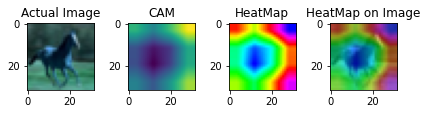

In [0]:
# Plot CAMS extracted
from textwrap import wrap
import matplotlib.pyplot as plt
import cv2

image = cv2.imread(image_path, 1)

f, axarr = plt.subplots(1,4)

axarr[0].title.set_text('Actual Image')
axarr[1].title.set_text('CAM')
axarr[2].set_title("\n".join(wrap('HeatMap')))
axarr[3].set_title("\n".join(wrap('HeatMap on Image')))
axarr[0].imshow(image)
axarr[1].imshow(activation_map)
axarr[2].imshow(activation_heatmap)
axarr[3].imshow(img_with_heatmap)
f.tight_layout()
plt.show()

In Forward pass
Grad cam completed


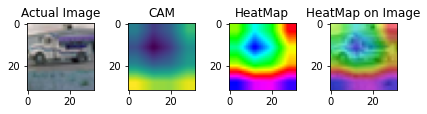

In [0]:

image_path = "/content/gdrive/My Drive/Colab Notebooks/cifra10_samples/truck9.png"#opt.img    
model_path = "/content/gdrive/My Drive/Colab Notebooks/SavedModels/Resnet18_on_Cifar_with_Albumenation_Augm.pth"
target_class = 'truck'
tgt_layer = 'layer4'
file_name = "Sample_truck"
model_instance = resnet.ResNet18().to(device)

#import GradCam_for_Resnet18

activation_map, activation_heatmap, img_with_heatmap = GradCam_for_Resnet18.get_CAMS(image_path,model_instance,model_path,target_class,tgt_layer,file_name)
image = cv2.imread(image_path, 1)

f, axarr = plt.subplots(1,4)

axarr[0].title.set_text('Actual Image')
axarr[1].title.set_text('CAM')
axarr[2].set_title("\n".join(wrap('HeatMap')))
axarr[3].set_title("\n".join(wrap('HeatMap on Image')))
axarr[0].imshow(image)
axarr[1].imshow(activation_map)
axarr[2].imshow(activation_heatmap)
axarr[3].imshow(img_with_heatmap)
f.tight_layout()
plt.show()